In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [9]:
img = Image.open('/content/gdrive/MyDrive/msrf/MoNuSeg 2018 Training Data/Tissue Images/TCGA-18-5592-01Z-00-DX1.tif').resize((1024, 1024))

In [10]:
img_arr = np.array(img)

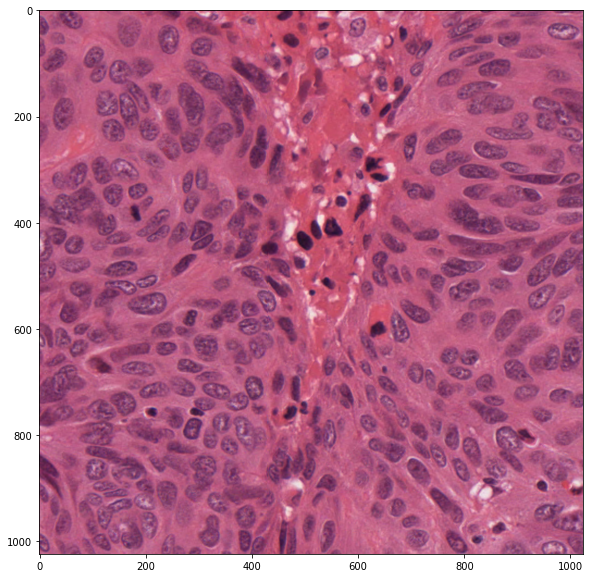

In [11]:
plt.figure(figsize = (10, 10))

plt.imshow(img_arr)
plt.show()

In [12]:
blank = np.zeros((1106, 1106, 3), dtype = np.uint8)

In [13]:
blank[42: 1066, 42: 1066] = img_arr

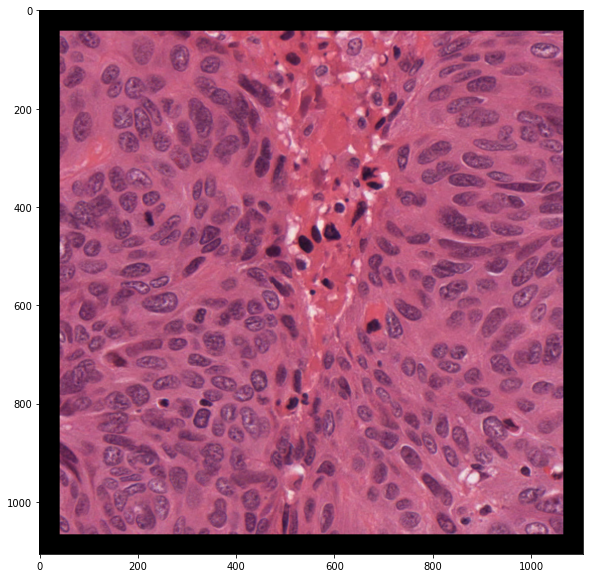

In [14]:
plt.figure(figsize = (10, 10))

plt.imshow(blank)
plt.show()

In [15]:
blank[: 42, 42: 1066] = np.flipud(img_arr[: 42])
blank[42: 1066, : 42] = np.fliplr(img_arr[:, : 42])
blank[-42:, 42: 1066] = np.flipud(img_arr[-42:])
blank[42: 1066, -42:] = np.fliplr(img_arr[:, -42:])

blank[: 42, : 42] = np.fliplr(np.flipud(img_arr[: 42, : 42]))
blank[: 42, -42:] = np.fliplr(np.flipud(img_arr[: 42, -42:]))
blank[-42:, : 42] = np.fliplr(np.flipud(img_arr[-42:, : 42]))
blank[-42:, -42:] = np.fliplr(np.flipud(img_arr[-42:, -42:]))

In [16]:
temp = blank.copy()
temp[40: 44, :] = [0, 0, 0]
temp[:, 40: 44] = [0, 0, 0]
temp[-44: -40, :] = [0, 0, 0]
temp[:, -44: -40] = [0, 0, 0]

temp[83: 85, 42: 1066] = [230, 230, 100]
temp[42: 1066, 83: 85] = [230, 230, 100]
temp[-85: -83, 42: 1066] = [230, 230, 100]
temp[42: 1066, -85: -83] = [230, 230, 100]

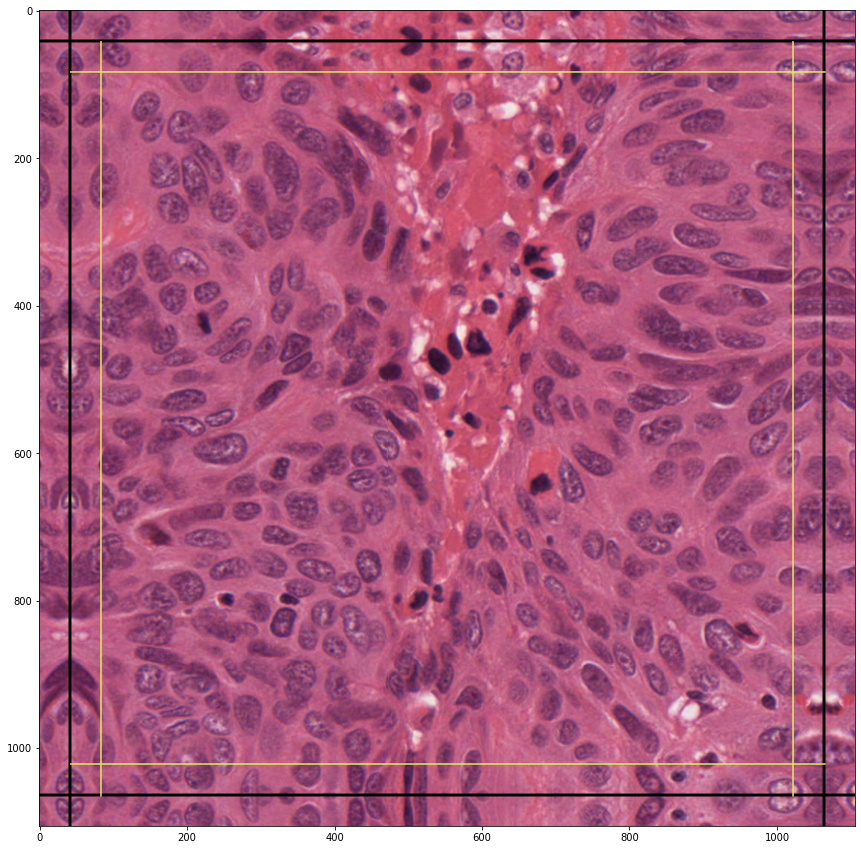

In [17]:
plt.figure(figsize = (15, 15))

plt.imshow(temp)
plt.show()